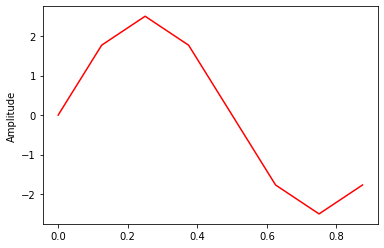

In [ ]:
"""
Compute the FFT of a given signal with N = 8 using Radix-2 algorithm
"""

import numpy as np
import matplotlib.pyplot as plt

# sampling rate
sr = 8

# sampling interval
ts = 1.0/sr
# x cordinate values 
# distance from 0 to 1 is divided into 128
# equidistant points
t = np.arange(0, 1, ts)

# frequency
freq = 1
x = 3*np.sin(2*np.pi*freq*t)

freq = 4
x += np.sin(2*np.pi*freq*t)

freq = 7
x += 0.5*np.sin(2*np.pi*freq*t)

# first argument is t and second argument is
# x, so t will be from 0 to 1
# third argument specify color of plot

plt.ylabel('Amplitude')
plt.plot(t, x, 'r')
plt.show()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:26: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.


<StemContainer object of 3 artists>

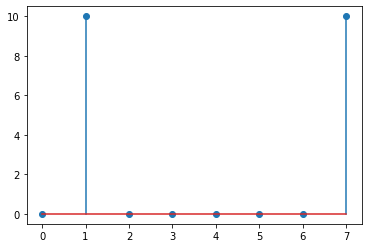

In [ ]:
def FFT(x):
  """
  A recursive implementation of 1D Cooley-Tukey FFT,
  the input should have a length of power of 2
  """

  N = len(x)
  if (N == 1):
    return x
  else:
    X_evens = FFT(x[::2])
    X_odds = FFT(x[1::2])

    factor = np.exp(-1j * 2 * np.pi * np.arange(N) / N)
    X = np.concatenate([X_evens + factor[:int(N/2)] * X_odds, X_evens + factor[int(N/2):] * X_odds])

    return X

X = FFT(x)
# calculating frequency
N = len(X)
n = np.arange(N)
T = N/sr
freq = n/T

plt.stem(freq, abs(X))

